# Advanced Machine Learning
## Assignment 3
###  Agnija Ashtrita (MDS202103), Ashutosh Maurya (MDS202110)

In [2]:
!pip install gym[classic_control]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 108 kB/s 


In [3]:
import gym
from gym import logger as gymlogger
import numpy as np
import random
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

from IPython import display as ipythondisplay
from gym.wrappers import record_video

In [10]:
import warnings
warnings.filterwarnings("ignore")

### Initialising q-table

We use the range given in the problem, and make 30 bins or intervals for each observation. We also define a function to discretize a given array of floats into these bins.

In [6]:
state_space = 4 # number of states
action_space = 2 # number of possible actions

def Qtable(state_space,action_space,bin_size = 30):
    
    bins = [np.linspace(-4.8,4.8,bin_size),
            np.linspace(-4,4,bin_size),
            np.linspace(-0.418,0.418,bin_size),
            np.linspace(-4,4,bin_size)]
    
    q_table = np.random.uniform(low=-0.05,high=0.05,size=([bin_size] * state_space + [action_space]))
    return q_table, bins

def Discrete(state, bins):
    index = []
    for i in range(len(state)): 
      index.append(np.digitize(state[i],bins[i]) - 1)
    return tuple(index)

### Recording the game

We define some utility functions to enable video recording of gym environment and displaying it

In [4]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    

def wrap_env(env):
  env = record_video(env, 'video')
  return env

### q-learning

We use the q-learning algorithm to train our reinforcement learning agent using the mentioned parameters. 

The q-table holds the q-value for each state-action pair, and it is updated greedily at each time step. After training, the action which gives the highest reward for a given state gives the optimal policy.

After every 1000 episodes, we check the average rewards over those episodes.

### ***First Reward Scheme***: Classic Game

In [11]:
env = gym.make("CartPole-v1", new_step_api=True)
env = gym.wrappers.RecordVideo(env, 'video')

q_table, bins = Qtable(state_space,action_space)

episodes = 25000
gamma = 0.95
lr = 0.1
timestep = 1000
epsilon = 0.2
    
rewards = 0
steps = 0

score_list = []
for episode in range(1,episodes+1):
    steps += 1 
    current_state = Discrete(env.reset(),bins)
  
    score = 0
    done = False
    trunc = False
    while not (done and trunc): 
      if np.random.uniform(0,1) < epsilon:
            action = env.action_space.sample()
      else:
            action = np.argmax(q_table[current_state])
      observation, reward, done, trunc = env.step(action)
      next_state = Discrete(observation,bins)
      score+=reward
      
      if not (done and trunc and score>=500):
            max_future_q = np.max(q_table[next_state])
            current_q = q_table[current_state+(action,)]
            new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
            q_table[current_state+(action,)] = new_q
      current_state = next_state
        
    else:
        rewards += score
        score_list.append(score)
    if episode % timestep == 0: 
      print("Episode: ", episode, "Average Reward for last 1000 episodes = ", rewards / timestep)
      rewards = 0

Episode:  1000 Average Reward for last 1000 episodes =  56.214
Episode:  2000 Average Reward for last 1000 episodes =  95.125
Episode:  3000 Average Reward for last 1000 episodes =  111.638
Episode:  4000 Average Reward for last 1000 episodes =  134.396
Episode:  5000 Average Reward for last 1000 episodes =  180.093
Episode:  6000 Average Reward for last 1000 episodes =  220.172
Episode:  7000 Average Reward for last 1000 episodes =  245.944
Episode:  8000 Average Reward for last 1000 episodes =  277.812
Episode:  9000 Average Reward for last 1000 episodes =  308.559
Episode:  10000 Average Reward for last 1000 episodes =  315.528
Episode:  11000 Average Reward for last 1000 episodes =  313.237
Episode:  12000 Average Reward for last 1000 episodes =  315.891
Episode:  13000 Average Reward for last 1000 episodes =  337.658
Episode:  14000 Average Reward for last 1000 episodes =  331.996
Episode:  15000 Average Reward for last 1000 episodes =  349.119
Episode:  16000 Average Reward for l

In [12]:
sum(score_list)/episodes

280.15376

In [13]:
max(score_list)

500.0

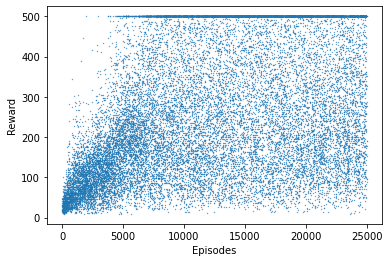

In [17]:
plt.scatter([x for x in range(episodes)], score_list, s=0.1)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.show()

The scatter plot shows that as the number of episodes increase, the rewards get higher on average.

In [18]:
show_video() # I have uploaded the video file separately

As we can see, the agent tries to maximise the time steps by keeping the pole upright as long as possible.
***

### ***Second Reward Scheme***: +2 for pole angle in range (-12, -6) or (6, 12) degrees, 0 otherwise

In [49]:
env_2 = gym.make("CartPole-v1")
env_2 = gym.wrappers.RecordVideo(env_2, 'video')

q_table, bins = Qtable(state_space,action_space)

episodes = 50000
gamma = 0.95
lr = 0.1
timestep = 1000
epsilon = 0.2
    
rewards = 0
steps = 0

score_list = []
for episode in range(1,episodes+1):
    steps += 1 
    current_state = Discrete(env_2.reset(),bins)
  
    score = 0
    done = False
    trunc = False
    while not (done and trunc): 
      if np.random.uniform(0,1) < epsilon:
            action = env_2.action_space.sample()
      else:
            action = np.argmax(q_table[current_state])
      observation, reward, done, trunc = env_2.step(action)
      next_state = Discrete(observation,bins)

      if -0.20944 < observation[2] < -0.10472 or 0.20944 > observation[2] > 0.10472: # converted degrees to radians
        reward = 2
      else:
        reward = 0
      
      score+=reward
      
      if not (done and trunc and score>=500):
            max_future_q = np.max(q_table[next_state])
            current_q = q_table[current_state+(action,)]
            new_q = (1-lr)*current_q + lr*(reward + gamma*max_future_q)
            q_table[current_state+(action,)] = new_q
      current_state = next_state
        
    else:
        rewards += score
        score_list.append(score)
    if episode % timestep == 0: 
      print("Episode: ", episode, "Average Reward for last 1000 episodes = ", rewards / timestep)
      rewards = 0

Episode:  1000 Average Reward for last 1000 episodes =  12.646
Episode:  2000 Average Reward for last 1000 episodes =  30.144
Episode:  3000 Average Reward for last 1000 episodes =  34.02
Episode:  4000 Average Reward for last 1000 episodes =  37.44
Episode:  5000 Average Reward for last 1000 episodes =  39.076
Episode:  6000 Average Reward for last 1000 episodes =  49.296
Episode:  7000 Average Reward for last 1000 episodes =  59.076
Episode:  8000 Average Reward for last 1000 episodes =  60.914
Episode:  9000 Average Reward for last 1000 episodes =  70.254
Episode:  10000 Average Reward for last 1000 episodes =  71.68
Episode:  11000 Average Reward for last 1000 episodes =  67.856
Episode:  12000 Average Reward for last 1000 episodes =  82.432
Episode:  13000 Average Reward for last 1000 episodes =  83.12
Episode:  14000 Average Reward for last 1000 episodes =  82.768
Episode:  15000 Average Reward for last 1000 episodes =  90.332
Episode:  16000 Average Reward for last 1000 episodes

In [50]:
sum(score_list)/episodes

95.0118

In [51]:
max(score_list)

204

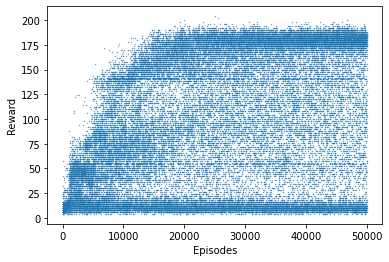

In [52]:
plt.scatter([x for x in range(episodes)], score_list, s=0.1)
plt.xlabel("Episodes")
plt.ylabel("Reward")
plt.show()

The scatter plot shows that as the number of episodes increase, the rewards get higher on average.

In [53]:
show_video() # I have uploaded the video file separately

As we expect, the agent learns to hold the pole in the given range of pole angle. This leads to termination of episode because of the cart's position. Better algorithms may be able to perform better by changing the cart's direction to the opposite side once it reaches the limit.

***